In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

### Implementation of 175nm UV light scattering from GXe/LXe to PTFE

Data from Fig5.24 (GXe) Fig7.5 (LXe) of PhD thesis: 
https://www-eng.lbl.gov/~shuman/NEXT/MATERIALS&COMPONENTS/MISC/PTFE-Reflectance-ThesisCoimbra.pdf

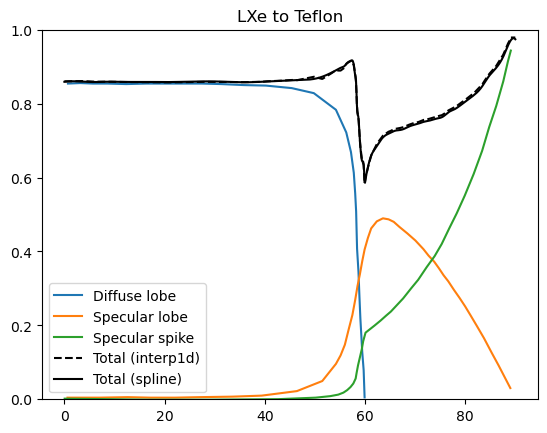

In [6]:
# LXe Teflon
# Diffuse lobe

x_diff_lobe = [0.7104557640750677, 3.1501340482573728, 5.683646112600536, 8.592493297587131, 12.345844504021448, 16.380697050938338, 19.85254691689008, 23.88739946380697, 27.453083109919568, 31.300268096514746, 35.80428954423593, 40.21447721179624, 45.37533512064343, 49.78552278820375, 54.19571045576407, 56.260053619302944, 57.19839142091153, 57.761394101876675, 58.042895442359246, 58.23056300268096, 58.324396782841816, 58.41823056300268, 58.69973190348525, 58.887399463806965, 59.075067024128685, 59.45040214477211, 59.73190348525469, 59.919571045576404]
y_diff_lobe = [0.8541737649063033, 0.8555366269165248, 0.8541737649063033, 0.8541737649063033, 0.8528109028960817, 0.8541737649063033, 0.8541737649063033, 0.8541737649063033, 0.8541737649063033, 0.8528109028960817, 0.850085178875639, 0.8487223168654174, 0.8419080068143101, 0.8282793867120954, 0.7833049403747872, 0.7219761499148212, 0.668824531516184, 0.612947189097104, 0.557069846678024, 0.5080068143100511, 0.4562180579216355, 0.40715502555366273, 0.3444633730834753, 0.279045996592845, 0.21908006814310052, 0.12776831345826234, 0.07870528109028961, 0.00511073253833047]

x_spec_lobe = [0.6166219839142091, 6.997319034852547, 12.62734584450402, 17.1313672922252, 22.10455764075067, 26.98391420911528, 33.552278820375335, 39.369973190348524, 46.40750670241287, 51.474530831099194, 54.19571045576407, 55.13404825737265, 55.97855227882037, 56.729222520107236, 57.4798927613941, 58.042895442359246, 58.51206434316354, 58.98123324396782, 59.45040214477211, 59.919571045576404, 60.57640750670241, 61.233243967828415, 62.35924932975871, 63.579088471849865, 64.70509383378015, 65.73726541554959, 66.8632707774799, 68.45844504021447, 70.05361930294906, 71.64879356568363, 72.68096514745308, 73.80697050938338, 74.74530831099196, 75.68364611260053, 76.62198391420911, 77.7479892761394, 78.8739946380697, 80, 81.03217158176943, 82.34584450402144, 83.75335120643432, 85.34852546916889, 86.6621983914209, 87.60053619302948, 89.00804289544236]
y_spec_lobe = [0.004408006814310028, 0.004408006814310028, 0.005770868824531511, 0.004408006814310028, 0.004408006814310028, 0.005770868824531511, 0.007133730834752966, 0.009859454855195904, 0.022125212947189082, 0.049382453151618405, 0.09571976149914821, 0.11888841567291313, 0.1475085178875639, 0.18839437819420785, 0.22791737649063035, 0.2688032367972743, 0.3069633730834753, 0.338309199318569, 0.3737436115843271, 0.4050894378194208, 0.4364352640545145, 0.46232964224872236, 0.48140971039182284, 0.4895868824531517, 0.4868611584327087, 0.4800468483816014, 0.4664182282793867, 0.4487010221465077, 0.42962095400340716, 0.40645229982964226, 0.38873509369676323, 0.37238074957410566, 0.35466354344122664, 0.3355834752981261, 0.31922913117546853, 0.29606047700170357, 0.2742546848381602, 0.2510860306643953, 0.22791737649063035, 0.19793441226575811, 0.16522572402044294, 0.12433986371379899, 0.09163117546848382, 0.06709965928449743, 0.030302385008517868]

x_spec_spike = [0.053619302949062586,16.56836461126005,28.954423592493296,42.65415549597855,50.160857908847184,53.069705093833775,54.66487935656836,55.697050938337796,56.447721179624665,57.10455764075067,57.66756032171581,58.1367292225201,58.324396782841816,58.605898123324394,58.98123324396782,59.356568364611256,59.63806970509383,60.10723860589812,61.89008042895442,63.10991957104557,64.23592493297588,65.17426273458445,66.30026809651474,67.61394101876675,69.20911528150134,70.6166219839142,72.30563002680964,73.90080428954423,75.3083109919571,76.80965147453082,78.31099195710455,79.90616621983914,81.68900804289544,83.37801608579088,84.78552278820375,86.19302949061661,87.60053619302948,88.53887399463807,89.10187667560321]
y_spec_spike = [0.001682282793867118,-0.0010434412265758197,-0.0010434412265758197,0.0003194207836456353,0.004408006814310028,0.008496592844974449,0.012585178875638842,0.01803662691652469,0.02485093696763202,0.033028109028960806,0.042568143100511074,0.05619676320272571,0.07118824531516182,0.09163117546848382,0.11343696763202726,0.1352427597955707,0.15704855195911416,0.18021720613287906,0.19929727427597957,0.21292589437819423,0.22655451448040886,0.2374574105621806,0.2538117546848382,0.27289182282793867,0.300149063032368,0.3233177172061329,0.35738926746166955,0.3873722316865418,0.4200809199318569,0.46232964224872236,0.5032155025553663,0.5509156729131176,0.6095187393526407,0.6722103918228279,0.7362649063032369,0.7935051107325384,0.8602853492333902,0.9147998296422488,0.9434199318568997]

plt.plot(x_diff_lobe,y_diff_lobe, label='Diffuse lobe')
plt.plot(x_spec_lobe,y_spec_lobe, label='Specular lobe')
plt.plot(x_spec_spike,y_spec_spike, label='Specular spike')

x = np.linspace(0, 90, 1000)

int_diff_lobe = np.interp(x, x_diff_lobe,y_diff_lobe)
int_spec_lobe = np.interp(x, x_spec_lobe,y_spec_lobe)
int_spec_spike = np.interp(x, x_spec_spike,y_spec_spike)

plt.plot(x,int_diff_lobe+int_spec_lobe+int_spec_spike, label='Total (interp1d)', c='k', linestyle='--')

spl_diff_lobe = CubicSpline(x_diff_lobe,y_diff_lobe)
spl_spec_lobe = CubicSpline(x_spec_lobe,y_spec_lobe)
spl_spec_spike = CubicSpline(x_spec_spike,y_spec_spike)

plt.plot(x,np.array([ max(0, _) for _ in spl_diff_lobe(x)]) 
 + np.array([ max(0, _) for _ in spl_spec_lobe(x)]) 
 + np.array([ max(0, _) for _ in spl_spec_spike(x)]),
 label='Total (spline)', c='k')

plt.ylim(0, 1)

plt.title("LXe to Teflon")
plt.legend()

In [12]:
val = spl_diff_lobe(0.0)
print(val)

0.852479422400159


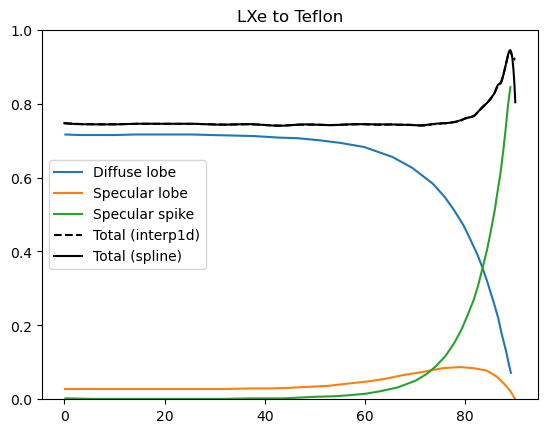

In [5]:
## Vacuum (Gas)

# Diffuse Lobe
x_diff_lobe = [0.20775623268698062, 3.0193905817174516, 5.92797783933518, 10.290858725761773, 14.072022160664819, 18.531855955678672, 22.21606648199446, 25.51246537396122, 29.196675900277008, 33.75346260387812, 37.825484764542935, 42.86703601108034, 46.45429362880886, 50.81717451523546, 54.986149584487535, 59.83379501385042, 65.45706371191136, 69.43213296398892, 73.50415512465375, 75.92797783933518, 77.77008310249307, 79.70914127423823, 81.06648199445983, 82.42382271468145, 83.1994459833795, 84.3628808864266, 85.13850415512465, 85.81717451523546, 86.59279778393352, 87.27146814404432, 88.14404432132964, 88.72576177285319, 89.11357340720222]
y_diff_lobe = [0.7164021164021164, 0.7149911816578485, 0.7149911816578485, 0.7149911816578485, 0.7164021164021164, 0.7164021164021164, 0.7164021164021164, 0.7164021164021164, 0.7149911816578485, 0.7135802469135804, 0.7121693121693122, 0.7079365079365081, 0.70652557319224, 0.7008818342151677, 0.6938271604938272, 0.6825396825396826, 0.6557319223985891, 0.6261022927689595, 0.5837742504409171, 0.5470899470899471, 0.5118165784832451, 0.46948853615520286, 0.43139329805996474, 0.39188712522045854, 0.3650793650793651, 0.3199294532627866, 0.28606701940035273, 0.2564373897707231, 0.2197530864197531, 0.17742504409171078, 0.1308641975308642, 0.09417989417989418, 0.07160493827160494]

# Specular Lobe
x_spec_lobe = [0.11080332409972193, 2.728531855955678, 5.734072022160665, 8.060941828254848, 11.066481994459833, 14.362880886426593, 18.725761772853186, 27.645429362880886, 32.202216066481995, 36.662049861495845, 40.73407202216067, 44.418282548476455, 48.49030470914128, 52.659279778393355, 57.21606648199446, 60.99722991689751, 64.29362880886427, 67.78393351800554, 71.7590027700831, 75.54016620498615, 78.93351800554017, 81.64819944598338, 84.3628808864266, 86.39889196675901, 87.75623268698061, 89.01662049861496, 89.88919667590028]
y_spec_lobe = [0.02786596119929452, 0.02786596119929452, 0.02786596119929452, 0.02786596119929452, 0.02786596119929452, 0.02786596119929452, 0.02786596119929452, 0.02786596119929452, 0.02786596119929452, 0.029276895943562614, 0.029276895943562614, 0.03068783068783068, 0.03350970017636684, 0.036331569664903, 0.04338624338624339, 0.04902998236331571, 0.0560846560846561, 0.06596119929453262, 0.0744268077601411, 0.08430335097001763, 0.0871252204585538, 0.08430335097001763, 0.07724867724867725, 0.060317460317460325, 0.041975308641975295, 0.022222222222222227, 0.00246913580246913]

# Specular spike
x_spec_spike = [0.20775623268698062, 6.024930747922438, 12.714681440443213, 19.501385041551245, 25.51246537396122, 31.52354570637119, 37.43767313019391, 43.739612188365655, 49.94459833795014, 53.822714681440445, 56.82825484764543, 60.22160664819945, 63.227146814404435, 66.5235457063712, 70.11080332409972, 72.34072022160666, 74.18282548476455, 76.1218836565097, 77.86703601108033, 79.22437673130194, 80.58171745152355, 81.74515235457064, 82.61772853185596, 83.49030470914128, 84.3628808864266, 85.0415512465374, 85.91412742382272, 86.49584487534626, 87.07756232686981, 87.65927977839335, 88.14404432132964, 88.53185595567868, 89.01662049861496]
y_spec_spike = [0.00246913580246913, 0.0010582010582010637, 0.0010582010582010637, 0.0010582010582010637, 0.0010582010582010637, 0.0010582010582010637, 0.00246913580246913, 0.00246913580246913, 0.006701940035273357, 0.008112874779541451, 0.010934744268077612, 0.015167548500881839, 0.022222222222222227, 0.032098765432098775, 0.05044091710758378, 0.06878306878306878, 0.08994708994708996, 0.1181657848324515, 0.15343915343915343, 0.1873015873015873, 0.23104056437389772, 0.2705467372134039, 0.3100529100529101, 0.3566137566137566, 0.4045855379188713, 0.44973544973544977, 0.5132275132275133, 0.5654320987654322, 0.6148148148148149, 0.6797178130511464, 0.7403880070546738, 0.7940035273368606, 0.8447971781305115]

plt.plot(x_diff_lobe,y_diff_lobe, label='Diffuse lobe')
plt.plot(x_spec_lobe,y_spec_lobe, label='Specular lobe')
plt.plot(x_spec_spike,y_spec_spike, label='Specular spike')

x = np.linspace(0, 90, 1000)

int_diff_lobe = np.interp(x, x_diff_lobe,y_diff_lobe)
int_spec_lobe = np.interp(x, x_spec_lobe,y_spec_lobe)
int_spec_spike = np.interp(x, x_spec_spike,y_spec_spike)

plt.plot(x,int_diff_lobe+int_spec_lobe+int_spec_spike, label='Total (interp1d)', c='k', linestyle='--')

spl_diff_lobe = CubicSpline(x_diff_lobe,y_diff_lobe)
spl_spec_lobe = CubicSpline(x_spec_lobe,y_spec_lobe)
spl_spec_spike = CubicSpline(x_spec_spike,y_spec_spike)

plt.plot(x,np.array([ max(0, _) for _ in spl_diff_lobe(x)]) 
 + np.array([ max(0, _) for _ in spl_spec_lobe(x)]) 
 + np.array([ max(0, _) for _ in spl_spec_spike(x)]),
 label='Total (spline)', c='k')

plt.ylim(0, 1)

plt.title("LXe to Teflon")
plt.legend()
